# Univariate and Multivariate Time Series

In [1]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [2]:
# Read in the excel sheet
xl = pd.ExcelFile("daily_weather_data_for_Aguafria_2003-2007.xlsx")

In [3]:
# Load the sheets
xl.sheet_names
[u'2003', u'2004', u'2005',u'2006',u'2007']

['2003', '2004', '2005', '2006', '2007']

In [4]:
# Parse the first four sheets into four dataframes
df1 = xl.parse("2003")
df2 = xl.parse("2004")
df3 = xl.parse("2005")
df4 = xl.parse("2006")

In [5]:
# Let's see how the data looks
df1.head(10)

,Local Time,JD,Ambient (°F),Temp(°C),WS(m/s),Exponential,E (W/m²)
0,2003-01-01 08:15:00,1,44.5,6.944444,0.74,0.026903,318.6
1,2003-01-01 08:30:00,1,45.0,7.222222,1.60,0.025223,349.4
2,2003-01-01 08:45:00,1,46.3,7.944444,0.85,0.026682,384.0
3,2003-01-01 09:00:00,1,47.6,8.666667,1.12,0.026148,412.9
4,2003-01-01 09:15:00,1,48.8,9.333333,0.76,0.026863,450.4
5,2003-01-01 09:30:00,1,50.1,10.055556,0.97,0.026443,488.4
6,2003-01-01 09:45:00,1,51.5,10.833333,1.20,0.025991,510.5
7,2003-01-01 10:00:00,1,53.1,11.722222,0.88,0.026622,519.8
8,2003-01-01 10:15:00,1,55.2,12.888889,0.56,0.027269,516.4
9,2003-01-01 10:30:00,1,54.7,12.611111,1.81,0.024829,546.6


In [6]:
df1.tail(10)

,Local Time,JD,Ambient (°F),Temp(°C),WS(m/s),Exponential,E (W/m²)
12027,2003-12-31 12:30:00,365,61.4,16.333333,0.12,0.028184,418.6
12028,2003-12-31 12:45:00,365,61.6,16.444444,0.60,0.027187,485.6
12029,2003-12-31 13:00:00,365,61.1,16.166667,1.14,0.026108,630.6
12030,2003-12-31 13:15:00,365,62.1,16.722222,1.01,0.026364,610.5
12031,2003-12-31 13:30:00,365,62.0,16.666667,1.50,0.025413,485.9
12032,2003-12-31 14:30:00,365,62.7,17.055556,0.25,0.027911,623.0
12033,2003-12-31 14:45:00,365,63.3,17.388889,0.39,0.027619,631.4
12034,2003-12-31 15:00:00,365,64.1,17.833333,0.73,0.026924,434.5
12035,2003-12-31 15:15:00,365,63.8,17.666667,0.71,0.026964,442.5
12036,2003-12-31 15:30:00,365,62.8,17.111111,1.37,0.025662,354.3


In [7]:
df1.describe()

,JD,Ambient (°F),Temp(°C),WS(m/s),Exponential,E (W/m²)
count,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000
mean,179.172053,81.282246,27.379026,1.454118,0.025586,728.427374
std,98.173393,15.822107,8.790060,1.108354,0.002025,192.031235
min,1.000000,35.600000,2.000000,0.000000,0.014921,300.000000
25%,100.000000,68.100000,20.055556,0.620000,0.024404,586.100000
50%,172.000000,81.800000,27.666667,1.220000,0.025952,767.000000
75%,262.000000,94.900000,34.944444,2.040000,0.027147,902.000000
max,365.000000,112.900000,44.944444,8.600000,0.028439,1093.000000


In [8]:
# Data types of columns
df1.dtypes

Local Time      datetime64[ns]
JD                       int64
Ambient (°F)           float64
Temp(°C)               float64
WS(m/s)                float64
Exponential            float64
E (W/m²)               float64
dtype: object

We see that there are many temperature readings taken throughout each day. We need to extract the daily maximum ambient temperature data.

In [9]:
# group by day, and select rows with the maximum temperature for that particular day.
# Max function selects the row with maximum temperature ('Ambient (°F)' column by default, as it is the first one after 'JD')
df1 = df1.groupby(['JD']).max()
df2 = df2.groupby(['JD']).max()
df3 = df3.groupby(['JD']).max()
df4 = df4.groupby(['JD']).max()

In [10]:
# Let's now see how one of our dataframes looks like
df2

,Local Time,Ambient (°F),Temp(°C),WS(m/s),Exponential,E (W/m²)
JD,,,,,,
1,2004-01-01 14:30:00,65.1,18.388889,1.48,0.027474,648.9
2,2004-01-02 15:15:00,67.1,19.500000,1.77,0.028226,642.4
3,2004-01-03 15:00:00,60.4,15.777778,4.20,0.026743,491.6
4,2004-01-04 15:30:00,56.9,13.833333,1.53,0.027744,662.4
5,2004-01-05 15:30:00,56.6,13.666667,1.52,0.028311,571.0
6,2004-01-06 15:30:00,70.2,21.222222,0.79,0.028439,651.3
7,2004-01-07 13:45:00,66.5,19.166667,1.11,0.028100,654.1
8,2004-01-08 15:30:00,72.9,22.722222,1.18,0.028418,633.0
9,2004-01-09 15:00:00,78.1,25.611111,1.76,0.028439,659.6


In [11]:
# Concatenate 4 years of data to better visualize the seasonality and trends in the time series
df = pd.concat([df1, df2, df3, df4])
df.describe()

,Ambient (°F),Temp(°C),WS(m/s),Exponential,E (W/m²)
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,85.430746,29.683748,2.813349,0.027746,885.309970
std,15.528485,8.626936,1.341338,0.001123,169.832108
min,47.000000,8.333333,0.000000,0.020262,326.300000
25%,72.000000,22.222222,1.890000,0.027578,753.000000
50%,85.300000,29.611111,2.575000,0.028226,931.500000
75%,99.900000,37.722222,3.470000,0.028439,1008.750000
max,115.000000,46.111111,9.690000,0.028439,1257.000000


## Univariate Time Series

### Time Series plots of Maximum Ambient Temperature data and Irradiance data separately

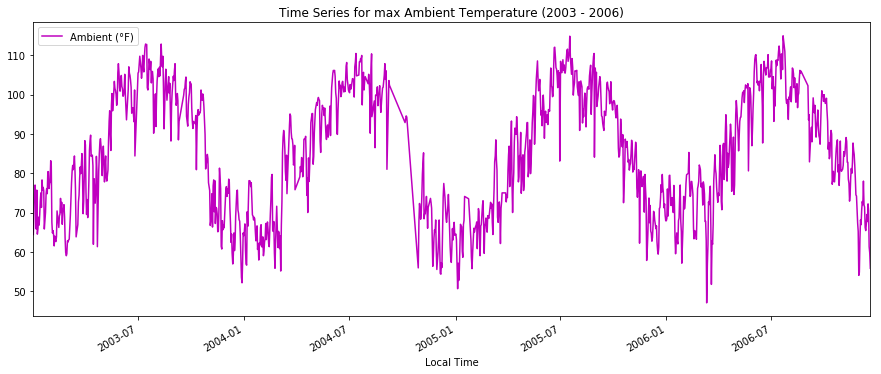

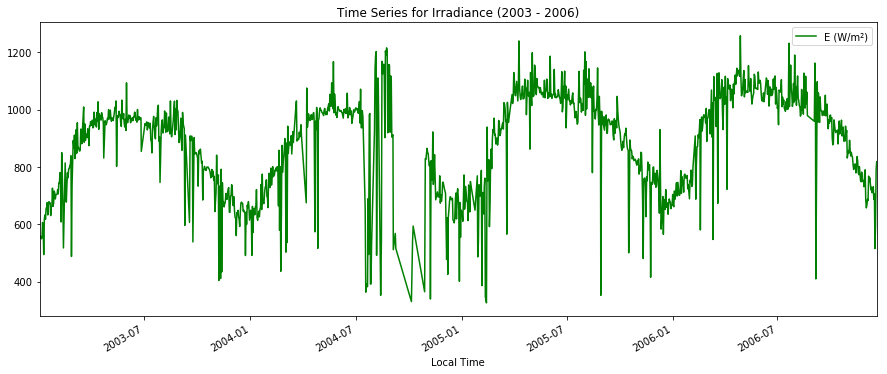

In [12]:
df.plot(x='Local Time', y='Ambient (°F)', title='Time Series for max Ambient Temperature (2003 - 2006)',figsize=(15,6), color='m')
plt.show()
df.plot(x='Local Time', y='E (W/m²)', title='Time Series for Irradiance (2003 - 2006)',figsize=(15,6), color='g')
plt.show()

## Multivariate Time Series

### Time Series plots of Maximum Ambient Temperature data and Irradiance data together

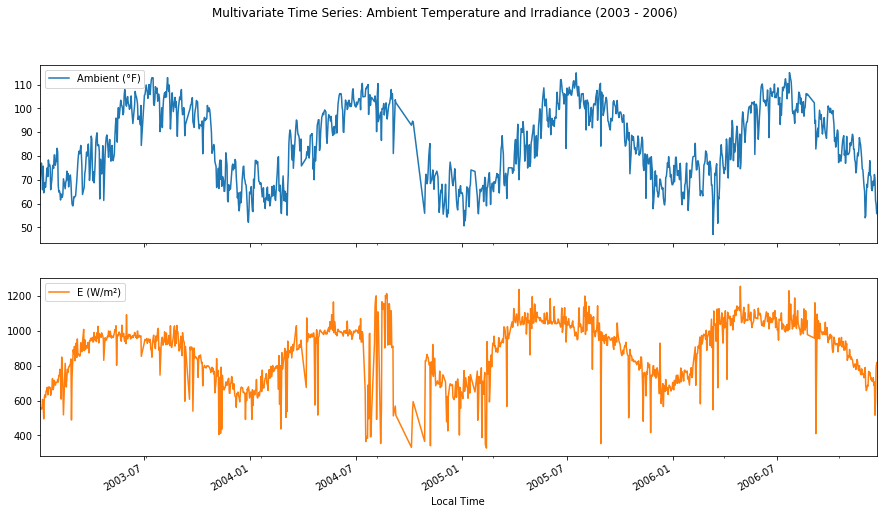

In [13]:
df[['Local Time', 'Ambient (°F)','E (W/m²)']].plot(x = 'Local Time',title='Multivariate Time Series: Ambient Temperature and Irradiance (2003 - 2006)', figsize=(15,8),subplots=True)
plt.show()